<a href="https://colab.research.google.com/github/SavannahY/Global-A.I.-Data-Science/blob/master/SDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SDG

##Load the data

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline



In [39]:
path = 'gdrive/My Drive/SDG_Data_File_Daily.csv'
df = pd.read_csv(path)

In [40]:
df.head()

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
0,0,2013-04-01,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-04-02,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-04-03,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-04-04,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-04-05,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.describe()

,Unnamed: 0,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,STS_17,STS_Mean,LTS_1,LTS_2,LTS_3,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
count,1.604138e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06,1.266540e+06,1.302011e+06,1.445644e+06,1.420867e+06,1.058791e+06,1.233136e+06,1.336369e+06,1.484403e+06,1.430361e+06,1.451407e+06,1.481187e+06,1.352800e+06,1.241856e+06,1.215373e+06,1.255458e+06,1.471184e+06,1.220113e+06,1.501782e+06,1.150773e+06,1.191963e+06,1.382040e+06,...,1.148964e+06,1.407379e+06,1.112797e+06,1.449726e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06
mean,8.020685e+05,-0.357852,0.062671,0.072872,0.719752,-1.380533,0.197805,0.108781,0.496932,-0.080738,0.107780,0.170012,0.010821,-0.443993,-0.159447,-0.398468,-0.182030,0.052788,2.831794e-01,-9.835792e-02,1.525737e-01,1.616909e-01,5.706206e-01,-5.394000e-01,2.861254e-01,2.055383e-01,4.735408e-01,7.855393e-02,1.717742e-01,2.021815e-01,1.253681e-01,-1.410265e-01,9.690566e-02,-1.021641e-01,-3.074522e-03,1.872461e-01,1.738749e-01,-1.951641e-01,1.931800e-01,2.166288e-01,...,-2.065652e-01,-1.967385e-02,2.295757e-01,2.059033e-01,1.830937,1.825867,1.947087,1.957604,2.033796,1.632097,1.649796,1.805746,1.921903,1.907206,1.937824,1.771611,1.819514,1.838424,1.828259,1.903333,1.771369,1.741477e+00,16.020963,13.972096,37.111761,28.377883,22.379870,9.318272,14.489539,36.883895,32.092309,40.255782,47.675005,16.328195,15.170356,11.717297,15.620668,46.400214,12.311924,1.691596e+01
std,4.630749e+05,2.102821,2.070824,2.068438,2.135078,2.658081,1.948228,1.796993,1.757527,2.071301,1.987096,1.983880,2.002093,2.153003,2.234790,2.156520,2.024761,2.146515,1.857531e+00,9.875986e-01,9.556521e-01,9.661291e-01,9.506840e-01,1.003356e+00,9.900551e-01,9.969123e-01,9.914281e-01,9.972469e-01,9.868459e-01,9.730402e-01,9.845476e-01,9.638124e-01,9.845512e-01,9.593857e-01,9.891114e-01,9.636989e-01,9.626420e-01,9.934300e-01,9.437956e-01,9.974397e-01,...,9.558929e-01,1.041336e+00,9.491697e-01,9.682403e-01,1.006029,1.007001,1.150142,1.080429,1.144429,0.954200,0.915378,1.009010,1.063366,1.035522,1.117093,0.978430,1.004856,1.020241,1.011565,1.122822,0.990017,7.414263e-01,75.531211,63.640417,251.011407,179.137799,117.444728,29.605740,49.687493,221.383753,195.607193,258.107416,335.831275,69.882129,74.771148,51.224955,78.833347,317.423683,50.670370,1.128878e+02
min,0.000000e+00,-21.967213,-21.967213,-26.383565,-26.383565,-24.137931,-16.409861,-16.586151,-26.383565,-19.975031,-17.957505,-26.383565,-20.772239,-17.391304,-18.604651,-17.391304,-26.383565,-18.835616,-2.638357e+01,-8.262921e+00,-8.081865e+00,-9.468227e+00,-8.237315e+00,-8.358393e+00,-9.178661e+00,-9.617961e+00,-1.107147e

In [42]:
df.shape

(1604138, 96)

In [43]:
grouped_df = df.groupby(['GICS Sector','Ticker'])

In [44]:
grouped_df.head()

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
0,0,2013-04-01,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-04-02,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-04-03,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-04-04,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-04-05,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601559,1601559,2013-04-01,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601560,1601560,2013-04-02,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601561,1601561,2013-04-03,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [45]:
grouped_df['SDG_News_Volume_Mean'].describe().unstack()

count          ...         max           
Ticker                       A     AAL  ...        ZION        ZTS
GICS Sector                             ...                       
Communication Services     NaN     NaN  ...         NaN        NaN
Consumer Discretionary     NaN     NaN  ...         NaN        NaN
Consumer Staples           NaN     NaN  ...         NaN        NaN
Energy                     NaN     NaN  ...         NaN        NaN
Financials                 NaN     NaN  ...  283.529412        NaN
Health Care             2058.0     NaN  ...         NaN  32.142857
Industrials                NaN  2572.0  ...         NaN        NaN
Information Technology     NaN     NaN  ...         NaN        NaN
Materials                  NaN     NaN  ...         NaN        NaN
Real Estate                NaN     NaN  ...         NaN        NaN
Utilities                  NaN     NaN  ...         NaN        NaN

[11 rows x 4976 columns]

In [46]:
grouped_df['SDG_Mean'].mean().reset_index()

,GICS Sector,Ticker,SDG_Mean
0,Communication Services,ATVI,-0.296826
1,Communication Services,CBS,0.838991
2,Communication Services,CHTR,-0.141742
3,Communication Services,CMCSA,-0.441688
4,Communication Services,CTL,0.380777
...,...,...,...
617,Utilities,SO,0.131370
618,Utilities,SRE,0.359084
619,Utilities,UGI,0.417344
620,Utilities,WEC,1.109142


Measures of Variability in Python

Pandas Standard deviation


In [47]:
grouped_df['SDG_News_Volume_Mean'].std().reset_index()


,GICS Sector,Ticker,SDG_News_Volume_Mean
0,Communication Services,ATVI,3.813528
1,Communication Services,CBS,1.915781
2,Communication Services,CHTR,9.544643
3,Communication Services,CMCSA,29.892311
4,Communication Services,CTL,2.974711
...,...,...,...
617,Utilities,SO,15.698301
618,Utilities,SRE,4.671249
619,Utilities,UGI,1.107565
620,Utilities,WEC,0.650793


Interquartile Range in Pandas


In [48]:
grouped_df['SDG_News_Volume_Mean'].quantile([.25, .5, .75]).unstack()


0.25       0.50       0.75
GICS Sector            Ticker                                
Communication Services ATVI    2.000000   3.181818   4.923077
                       CBS     1.000000   1.250000   2.000000
                       CHTR    1.916667   3.111111   5.000000
                       CMCSA   8.953125  16.705882  29.880515
                       CTL     1.250000   2.000000   3.000000
...                                 ...        ...        ...
Utilities              SO      3.384615   5.937500  10.081731
                       SRE     1.333333   2.333333   4.000000
                       UGI     1.000000   1.000000   1.555556
                       WEC     1.000000   1.000000   1.237500
                       XEL     2.857143   4.625000   7.266667

[622 rows x 3 columns]

Here CMCSA(Comcast) and SO(Southern Company)and has a relatively higher news volumn.

Pandas Variance

In [49]:
grouped_df['SDG_News_Volume_Mean'].var().reset_index()


,GICS Sector,Ticker,SDG_News_Volume_Mean
0,Communication Services,ATVI,14.542995
1,Communication Services,CBS,3.670216
2,Communication Services,CHTR,91.100217
3,Communication Services,CMCSA,893.550228
4,Communication Services,CTL,8.848904
...,...,...,...
617,Utilities,SO,246.436666
618,Utilities,SRE,21.820570
619,Utilities,UGI,1.226701
620,Utilities,WEC,0.423531


In [50]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Ticker', 'ISIN', 'Company_Name',
       'GICS Sector', 'SDG_1', 'SDG_2', 'SDG_3', 'SDG_4', 'SDG_5', 'SDG_6',
       'SDG_7', 'SDG_8', 'SDG_9', 'SDG_10', 'SDG_11', 'SDG_12', 'SDG_13',
       'SDG_14', 'SDG_15', 'SDG_16', 'SDG_17', 'SDG_Mean', 'STS_1', 'STS_2',
       'STS_3', 'STS_4', 'STS_5', 'STS_6', 'STS_7', 'STS_8', 'STS_9', 'STS_10',
       'STS_11', 'STS_12', 'STS_13', 'STS_14', 'STS_15', 'STS_16', 'STS_17',
       'STS_Mean', 'LTS_1', 'LTS_2', 'LTS_3', 'LTS_4', 'LTS_5', 'LTS_6',
       'LTS_7', 'LTS_8', 'LTS_9', 'LTS_10', 'LTS_11', 'LTS_12', 'LTS_13',
       'LTS_14', 'LTS_15', 'LTS_16', 'LTS_17', 'LTS_Mean', 'SDG_1_STD',
       'SDG_2_STD', 'SDG_3_STD', 'SDG_4_STD', 'SDG_5_STD', 'SDG_6_STD',
       'SDG_7_STD', 'SDG_8_STD', 'SDG_9_STD', 'SDG_10_STD', 'SDG_11_STD',
       'SDG_12_STD', 'SDG_13_STD', 'SDG_14_STD', 'SDG_15_STD', 'SDG_16_STD',
       'SDG_17_STD', 'SDG_STD_Mean', 'SDG_1_News_Volume', 'SDG_2_News_Volume',
       'SDG_3_News_Volume',

In [51]:
df.tail()

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
1604133,1604133,2020-04-18,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.590885,0.408976,0.403048,0.373011,-0.011969,0.203875,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.582606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604134,1604134,2020-04-19,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.590885,0.408976,0.403048,0.373011,-0.011969,0.203875,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.582606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604135,1604135,2020-04-20,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.01937,1.013147,0.497486,0.408976,0.403048,0.373011,-0.011969,0.151081,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.578599,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1604136,1604136,2020-04-21,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.01937,1.013147,0.360956,0.408976,0.403048,0.373011,-0.011969,0.107059,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.574723,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1604137,1604137,2020-04-22,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.360956,0.408976,0.403048,0.373011,-0.011969,0.107059,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.574723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
grouped_df.tail()

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
2574,2574,2020-04-18,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,0.691222,0.691222,NaN,NaN,NaN,NaN,NaN,NaN,0.691222,NaN,NaN,NaN,NaN,-0.589391,NaN,0.371069,0.23893,0.705084,-0.690485,0.045979,1.008706,1.301666,-0.201022,0.084781,0.625076,-0.313566,-0.692083,0.199022,1.143061,-0.184751,1.149630,-0.382145,...,0.077051,0.059655,0.927694,0.604545,NaN,NaN,1.109895,1.109895,NaN,NaN,NaN,NaN,NaN,NaN,1.109895,NaN,NaN,NaN,NaN,2.000000,NaN,1.332421,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,2.5
2575,2575,2020-04-19,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23893,0.705084,-0.690485,0.045979,1.008706,1.301666,-0.201022,0.084781,0.625076,-0.313566,-0.692083,0.199022,1.143061,-0.184751,1.149630,-0.382145,...,0.077051,0.059655,0.927694,0.604545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2576,2576,2020-04-20,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,0.717707,NaN,NaN,NaN,NaN,0.613497,NaN,-0.164581,0.821918,NaN,NaN,NaN,NaN,NaN,NaN,0.497135,0.23893,0.705084,-0.229388,0.045979,1.008706,1.301666,-0.201022,-0.084252,0.625076,-0.290777,-0.381270,0.199022,1.143061,-0.184751,1.149630,-0.382145,...,0.077051,0.059655,0.927694,0.603431,NaN,NaN,0.147376,NaN,NaN,NaN,NaN,2.000000,NaN,0.000745,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.037030,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5
2577,2577,2020-04-21,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,0.578771,0.540541,NaN,NaN,NaN,0.818866,NaN,NaN,0.245902,NaN,NaN,NaN,NaN,2.315371,NaN,0.899890,0.23893,0.705084,0.098120,0.131219,1.008706,1.301666,-0.201022,0.136199,0.625076,-0.290777,-0.155068,0.199022,1.143061,-0.184751,1.149630,0.048467,...,0.077051,0.110015,0.927694,0.606381,NaN,NaN,1.864470,2.000000,NaN,NaN,NaN,0.209626,NaN,NaN,2.888589,NaN,NaN,NaN,NaN,1.790247,NaN,1.750586,NaN,NaN,6.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.2
2578,2578,2020-04-22,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,-2.600473,3.422983,NaN,NaN,NaN,NaN,NaN,-0.236247,1.415164,NaN,NaN,NaN,NaN,3.422983,NaN,1.084882,0.23893,0.705084,-0.091389,1.245496,1.008706,1.301666,-0.201022,0.136199,0.625076,-0.230140,0.104697,0.199022,1.143061,-0.184751,1.149630,1.219432,...,0.077051,0.275072,0.927694,0.625676,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,3.477644,NaN,NaN,NaN,NaN,0.000000,NaN,1.495529,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604133,1604133,2020-04-18,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.590885,0.408976,0.403048,0.373011,-0.011969,0.203875,0.276274

In [53]:
df_ticker = df.groupby(["Ticker"])

In [54]:
df_ticker.count()

,Unnamed: 0,Timestamp,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,STS_17,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,2579,2579,2579,2579,2579,384,658,1867,1600,75,324,603,1707,1098,1138,1922,683,397,212,367,1520,363,2058,2383,2425,2530,2502,1816,2226,2434,2502,2456,2507,2508,2424,2401,2124,2353,2501,2130,...,2321,2464,1982,2484,384,658,1867,1600,75,324,603,1707,1098,1138,1922,683,397,212,367,1520,363,2058,384,658,1867,1600,75,324,603,1707,1098,1138,1922,683,397,212,367,1520,363,2058
AAL,2579,2579,2579,2579,2579,2290,2306,2529,2508,2123,1701,2246,2559,2555,2572,2566,2495,2304,2202,2337,2568,2291,2572,2563,2564,2569,2568,2552,2500,2546,2573,2572,2573,2572,2568,2564,2532,2564,2573,2564,...,2540,2565,2526,2565,2290,2306,2529,2508,2123,1701,2246,2559,2555,2572,2566,2495,2304,2202,2337,2568,2291,2572,2290,2306,2529,2508,2123,1701,2246,2559,2555,2572,2566,2495,2304,2202,2337,2568,2291,2572
AAP,2579,2579,2579,2579,2579,244,302,1271,957,80,138,407,1534,1191,912,1522,396,302,182,321,1318,201,1829,2345,2341,2475,2490,1841,2008,2369,2491,2475,2450,2495,2380,2345,2319,2352,2485,2101,...,2084,2415,1878,2447,244,302,1271,957,80,138,407,1534,1191,912,1522,396,302,182,321,1318,201,1829,244,302,1271,957,80,138,407,1534,1191,912,1522,396,302,182,321,1318,201,1829
AAPL,2579,2579,2579,2579,2579,2233,2181,2536,2534,1816,1687,2309,2570,2541,2569,2568,2486,2048,1760,2072,2566,2278,2573,2568,2565,2573,2573,2548,2556,2569,2573,2573,2572,2573,2570,2556,2550,2556,2573,2562,...,2530,2564,2534,2565,2233,2181,2536,2534,1816,1687,2309,2570,2541,2569,2568,2486,2048,1760,2072,2566,2278,2573,2233,2181,2536,2534,1816,1687,2309,2570,2541,2569,2568,2486,2048,1760,2072,2566,2278,2573
ABBV,2579,2579,2579,2579,2579,408,427,2208,1484,163,235,731,2093,1421,1638,2203,1202,384,267,435,1971,762,2251,2128,2096,2556,2507,2109,2047,2348,2547,2505,2502,2556,2463,2105,2437,2105,2542,2339,...,2052,2498,2168,2521,408,427,2208,1484,163,235,731,2093,1421,1638,2203,1202,384,267,435,1971,762,2251,408,427,2208,1484,163,235,731,2093,1421,1638,2203,1202,384,267,435,1971,762,2251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z,2579,2579,2579,2579,2579,496,330,1127,937,118,125,381,1765,1027,986,1419,751,255,296,294,1270,348,1803,2413,2404,2439,2450,1969,1981,2163,2528,2459,2451,2479,2395,2169,1941,2169,2453,2134,...,1914,2428,2019,2471,496,330,1127,937,118,125,381,1765,1027,986,1419,751,255,296,294,1270,348,1803,496,330,1127,937,118,125,381,1765,1027,986,1419,751,255,296,294,1270,348,1803
ZAYO,2579,2579,2579,2579,2579,69,93,653,488,26,61,127,847,494,419,853,315,66,84,75,734,85,1148,2031,2169,2407,2465,1899,2018,2030,2465,2429,2345,2458,2429,2183,1931,2183,2458,1875,...,1735,2395,1622,2395,69,93,653,488,26,61,127,847,494,419,853,315,66,84,75,734,85,1148,69,93,653,488,26,61,127,847,494,419,853,315,66,84,75,734,85,1148
ZBH,2579,2579,2579,2579,2579,92,123,1370,499,31,66,192,1198,477,476,1391,323,84,104,108,808,123,14

## Data Proprocessing

In [55]:
print('Unique values in `Ticker` column:', list(df.Ticker.unique()))

Unique values in `Ticker` column: ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFG', 'AFL', 'AGCO', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALKS', 'ALL', 'ALLE', 'ALLY', 'ALNY', 'ALV', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMTD', 'AMZN', 'AN', 'ANDV', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'AR', 'ARMK', 'ARW', 'ASH', 'ATH', 'ATO', 'ATVI', 'AVB', 'AVP', 'AVT', 'AVY', 'AWK', 'AXP', 'AXS', 'AXTA', 'AYI', 'AZO', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BDX', 'BEN', 'BF/B', 'BG', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMRN', 'BMY', 'BR', 'BRK/B', 'BRX', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CBS', 'CC', 'CCI', 'CCK', 'CCL', 'CDK', 'CDNS', 'CDW', 'CE', 'CELG', 'CERN', 'CF', 'CFG', 'CGNX', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CIT', 'CL', 'CLB', 'CLR', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI',

In [62]:
#How many missing data points do we have?

# get the number of missing data points per column

missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[6:6+17]

SDG_1     1216457
SDG_2     1181444
SDG_3      798776
SDG_4      955292
SDG_5     1374744
SDG_6     1259241
SDG_7     1100268
SDG_8      692181
SDG_9      918354
SDG_10     884111
SDG_11     707792
SDG_12    1087753
SDG_13    1238850
SDG_14    1285305
SDG_15    1210826
SDG_16     782146
SDG_17    1251558
dtype: int64

We have 1604138 in total and more than half of the columns are blank.
 



In [57]:
# Number of companies:
len(list(df.Ticker.unique()))

622

In [60]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

43.28540533399662


In [63]:
# how many total missing values do we have?
total_cells = 17*1604138
total_missing = missing_values_count[6:6+17].sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

65.80443827152028



removing columns we do not need,
check missing values
CMCSA(Comcast) and SO(Southern Company)

A value is missing becuase it doesn't exist then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. 

In [73]:
# remove all the rows that contain a missing value
# 102073 rows × 96 columns

withoutNa_df = df.dropna()

In [69]:
# This doesn't work
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)

# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 96 

Columns with na's dropped: 5


In [72]:
## get a small subset of the NFL dataset
SDG_data = df.loc[:, 'SDG_1':'SDG_17'].head()
SDG_data

,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Indexing with Time Series Data

In [83]:
CMCSA_data = withoutNa_df[withoutNa_df.Ticker.isin(['CMCSA'])]
print(CMCSA_data)

        Unnamed: 0   Timestamp  ... SDG_17_News_Volume SDG_News_Volume_Mean
335383      335383  2013-07-23  ...                5.0             5.588235
335412      335412  2013-08-21  ...                2.0            13.117647
335441      335441  2013-09-19  ...                1.0             4.117647
335469      335469  2013-10-17  ...                5.0             7.411765
335579      335579  2014-02-04  ...                1.0             4.882353
...            ...         ...  ...                ...                  ...
337832      337832  2020-04-06  ...                5.0            17.176471
337838      337838  2020-04-12  ...                1.0             7.176471
337840      337840  2020-04-14  ...               10.0            24.588235
337843      337843  2020-04-17  ...                3.0            15.294118
337846      337846  2020-04-20  ...                2.0            12.117647

[1140 rows x 96 columns]


In [108]:
CMCSA_df = CMCSA_data[ ['Timestamp'] + list(CMCSA_data.loc[:,'SDG_1':'SDG_Mean']) ]


In [109]:
# dtype('O'), "O" is the code for "object"
CMCSA_df['Timestamp'].dtype

dtype('O')

Convert our date columns to datetime¶


In [111]:
# create a new column, date_parsed, with the parsed dates
CMCSA_df['Timestamp'] = pd.to_datetime(CMCSA_df['Timestamp'])
CMCSA_df.set_index('Timestamp',inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
CMCSA_df.head

<bound method NDFrame.head of                SDG_1     SDG_2     SDG_3  ...    SDG_16    SDG_17  SDG_Mean
Timestamp                                 ...                              
2013-07-23 -0.266904 -0.266904  1.565868  ... -0.350823 -0.875618 -0.130863
2013-08-21 -3.298040 -1.390465 -1.121808  ... -0.142483 -1.989590 -1.967195
2013-09-19 -0.212993 -0.212993  4.112337  ... -1.759727 -0.212993  1.080744
2013-10-17  3.211009  2.610890  2.215722  ...  1.431518  2.179869  1.451944
2014-02-04  1.315789  1.155116  0.842156  ... -0.844424  1.155116  0.296486
...              ...       ...       ...  ...       ...       ...       ...
2020-04-06 -0.772729  0.111607 -0.515292  ... -1.117755  0.167149 -0.478724
2020-04-12 -0.615665  0.442999  0.233663  ... -0.443085  1.984446  0.584394
2020-04-14 -0.620649  0.593565 -0.371695  ... -0.480594  1.787150 -0.955745
2020-04-17 -0.944887  0.771997 -0.112605  ... -0.700838 -1.312455 -0.650523
2020-04-20 -1.240542 -0.769242  0.988095  ... -1.090842 -0

### Plot the data

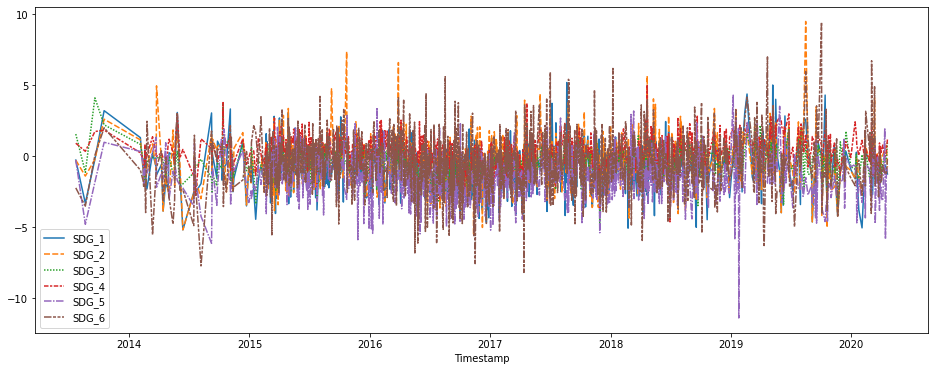

In [118]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how SDGs evolved over time 
sns.lineplot(data=CMCSA_df.loc[:,'SDG_1':'SDG_6'])

Text(0.5, 0, 'Date')

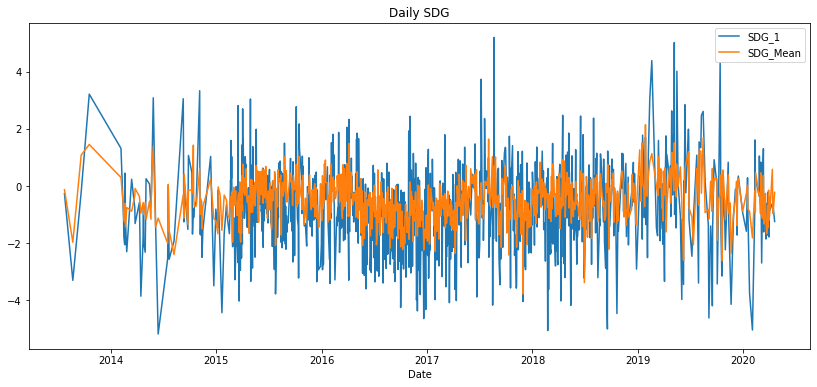

In [121]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily SDG")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=CMCSA_df.loc[:,'SDG_1'], label="SDG_1")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=CMCSA_df.loc[:,'SDG_Mean'], label="SDG_Mean")

# Add label for horizontal axis
plt.xlabel("Date")